In [20]:
import numpy as np
import pandas as pd
from pandana.loaders import osm

import warnings
warnings.filterwarnings('ignore')

import pandana

In [21]:
pd.options.display.float_format = '{:.2f}'.format

In [22]:
restaurants = osm.node_query(
    56.226797, 43.906516, 56.426797, 44.106516, tags='"amenity"="restaurant"')

In [23]:
network = osm.pdna_network_from_bbox(56.026797, 43.906516, 56.626797, 44.106516)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](56.02679700,43.90651600,56.62679700,44.10651600);>;);out;'}"
Downloaded 24,463.2KB from www.overpass-api.de in 11.35 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 13.74 seconds
Returning OSM data with 174,712 nodes and 41,107 ways...
Edge node pairs completed. Took 141.38 seconds
Returning processed graph with 56,258 nodes and 80,546 edges...
Completed OSM data download and Pandana node and edge table creation in 159.89 seconds


In [24]:
restaurant_nodes = network.get_node_ids(restaurants.lon, restaurants.lat)

In [25]:
network.set(restaurant_nodes, 
            name = 'restaurants')

In [26]:
accessibility = network.aggregate(distance = 1000,
                                  type = 'count',
                                  name = 'restaurants')
accessibility.describe()

count   56258.00
mean       33.22
std        35.23
min         0.00
25%         2.00
50%        16.00
75%        73.00
max        93.00
dtype: float64

In [27]:
results = network.nearest_pois(distance = 1000,
                               category = 'restaurants',
                               num_pois = 3,
                               include_poi_ids = True)
results.head()

AssertionError: Need to call set_pois for this category

In [28]:
import matplotlib
from matplotlib import pyplot as plt

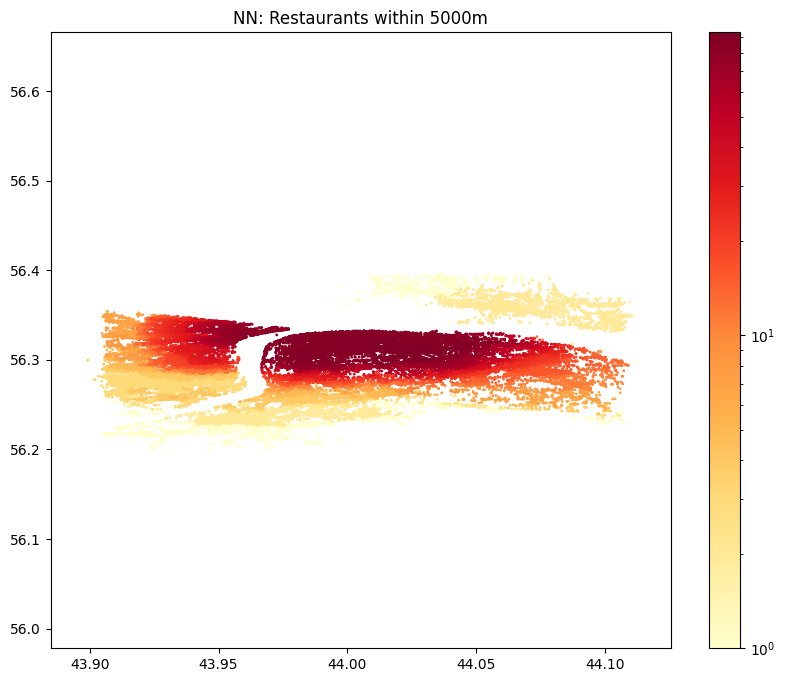

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

plt.title('NN: Restaurants within 5000m')
plt.scatter(network.nodes_df.x, network.nodes_df.y, 
            c=accessibility, s=1, cmap='YlOrRd', 
            norm=matplotlib.colors.LogNorm())
cb = plt.colorbar()

plt.show()